In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [4]:
for roots, dirs, files in os.walk(os.getcwd()):
    print(files)

['Untitled.ipynb', 'Untitled1.ipynb', 'variance_it_instrument.csv', 'variance_jt_instrument.csv', 'variance_of_Vit_instrument.csv', 'variance_of_Vjt_instrument.csv', 'variance_t_instrument.csv']
['Untitled-checkpoint.ipynb', 'Untitled1-checkpoint.ipynb']


## Data

In [36]:
df_var_it_instr = pd.read_csv('variance_it_instrument.csv')
df_var_vit_instr = pd.read_csv('variance_of_Vit_instrument.csv')
df_var_t_instr = pd.read_csv('variance_t_instrument.csv')

In [82]:
df_comp_name = pd.read_csv('C:/Users/michi/Projects/capstone/company_name.csv')

In [88]:
df_comp_name[df_comp_name['LGCYINVESTORID'] == 2003762]['FULLNAME'].to_list()[0]

'Aegon Asset Management Ltd'

In [42]:
df_ts = pd.pivot_table(df_var_it_instr, index=['HOLDDATE'], columns=['LGCYINVESTORID'], values='Delta', fill_value=0.0)
df_ts_no_fill = pd.pivot_table(df_var_it_instr, index=['LGCYINVESTORID'], columns=['HOLDDATE'], values='Delta')

In [89]:
def get_comp_name(ID):
    return df_comp_name[df_comp_name['LGCYINVESTORID'] == ID]['FULLNAME'].to_list()[0]

## Top 10 and Tail 10 Variances

In [63]:
df_top_10 = pd.DataFrame(columns=df_ts_no_fill.columns)
df_tail_10 = pd.DataFrame(columns=df_ts_no_fill.columns)

In [91]:
for t in df_ts_no_fill.columns:
    df_top_10[t] = df_ts_no_fill[t].sort_values(ascending=True)[:10].index
    df_tail_10[t] = df_ts_no_fill[t].sort_values(ascending=False)[:10].index
df_top_10_name = df_top_10.applymap(get_comp_name)
df_tail_10_name = df_tail_10.applymap(get_comp_name)

In [102]:
df_top_10_name.to_csv('top 10 variance.csv', index=False)

In [108]:
df_tail_10_name.transpose().to_csv('tail 10 variance.csv', index=True)

## Top 10 and Tail 10 Variances Compare to Whole Market

In [136]:
def subtract_mean(x, mean):
    if not pd.isna(x):
        return abs(x-mean)
    return x

In [137]:
df_temp = df_ts_no_fill
for t in df_temp.columns:
    df_temp[t]=df_temp[t].apply(subtract_mean, args=(df_var_t_instr['Delta'][t],))

In [139]:
df_top_10_to_mean = pd.DataFrame(columns=df_temp.columns)
df_tail_10_to_mean = pd.DataFrame(columns=df_temp.columns)

for t in df_temp.columns:
    df_top_10_to_mean[t] = df_temp[t].sort_values(ascending=True)[:10].index
    df_tail_10_to_mean[t] = df_temp[t].sort_values(ascending=False)[:10].index
df_top_10_to_mean_name = df_top_10_to_mean.applymap(get_comp_name)
df_tail_10_to_mean_name = df_tail_10_to_mean.applymap(get_comp_name)

In [ ]:
df_top_10_to_mean_name.transpose().to_csv('top 10 variance to whole.csv', index=True)
df_tail_10_to_mean_name.transpose().to_csv('tail 10 variance to whole.csv', index=True)

## Time Series Plot

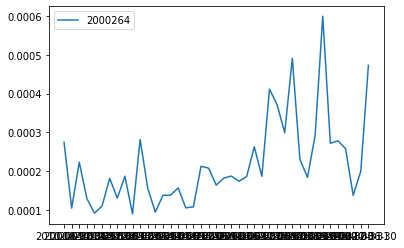

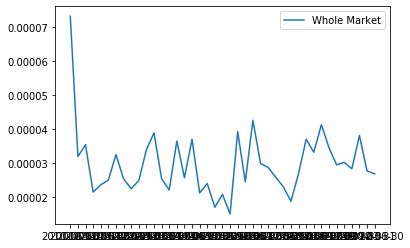

In [198]:
plt.plot(df_ts[2000264], label='2000264')
# plt.plot(df_var_vit_instr['Delta'], label='mean')
plt.legend()
plt.show()

# plt.plot(df_ts[2000264], label='2000264')
plt.plot(df_var_t_instr['Delta'], label='Whole Market')
plt.legend()
plt.show()

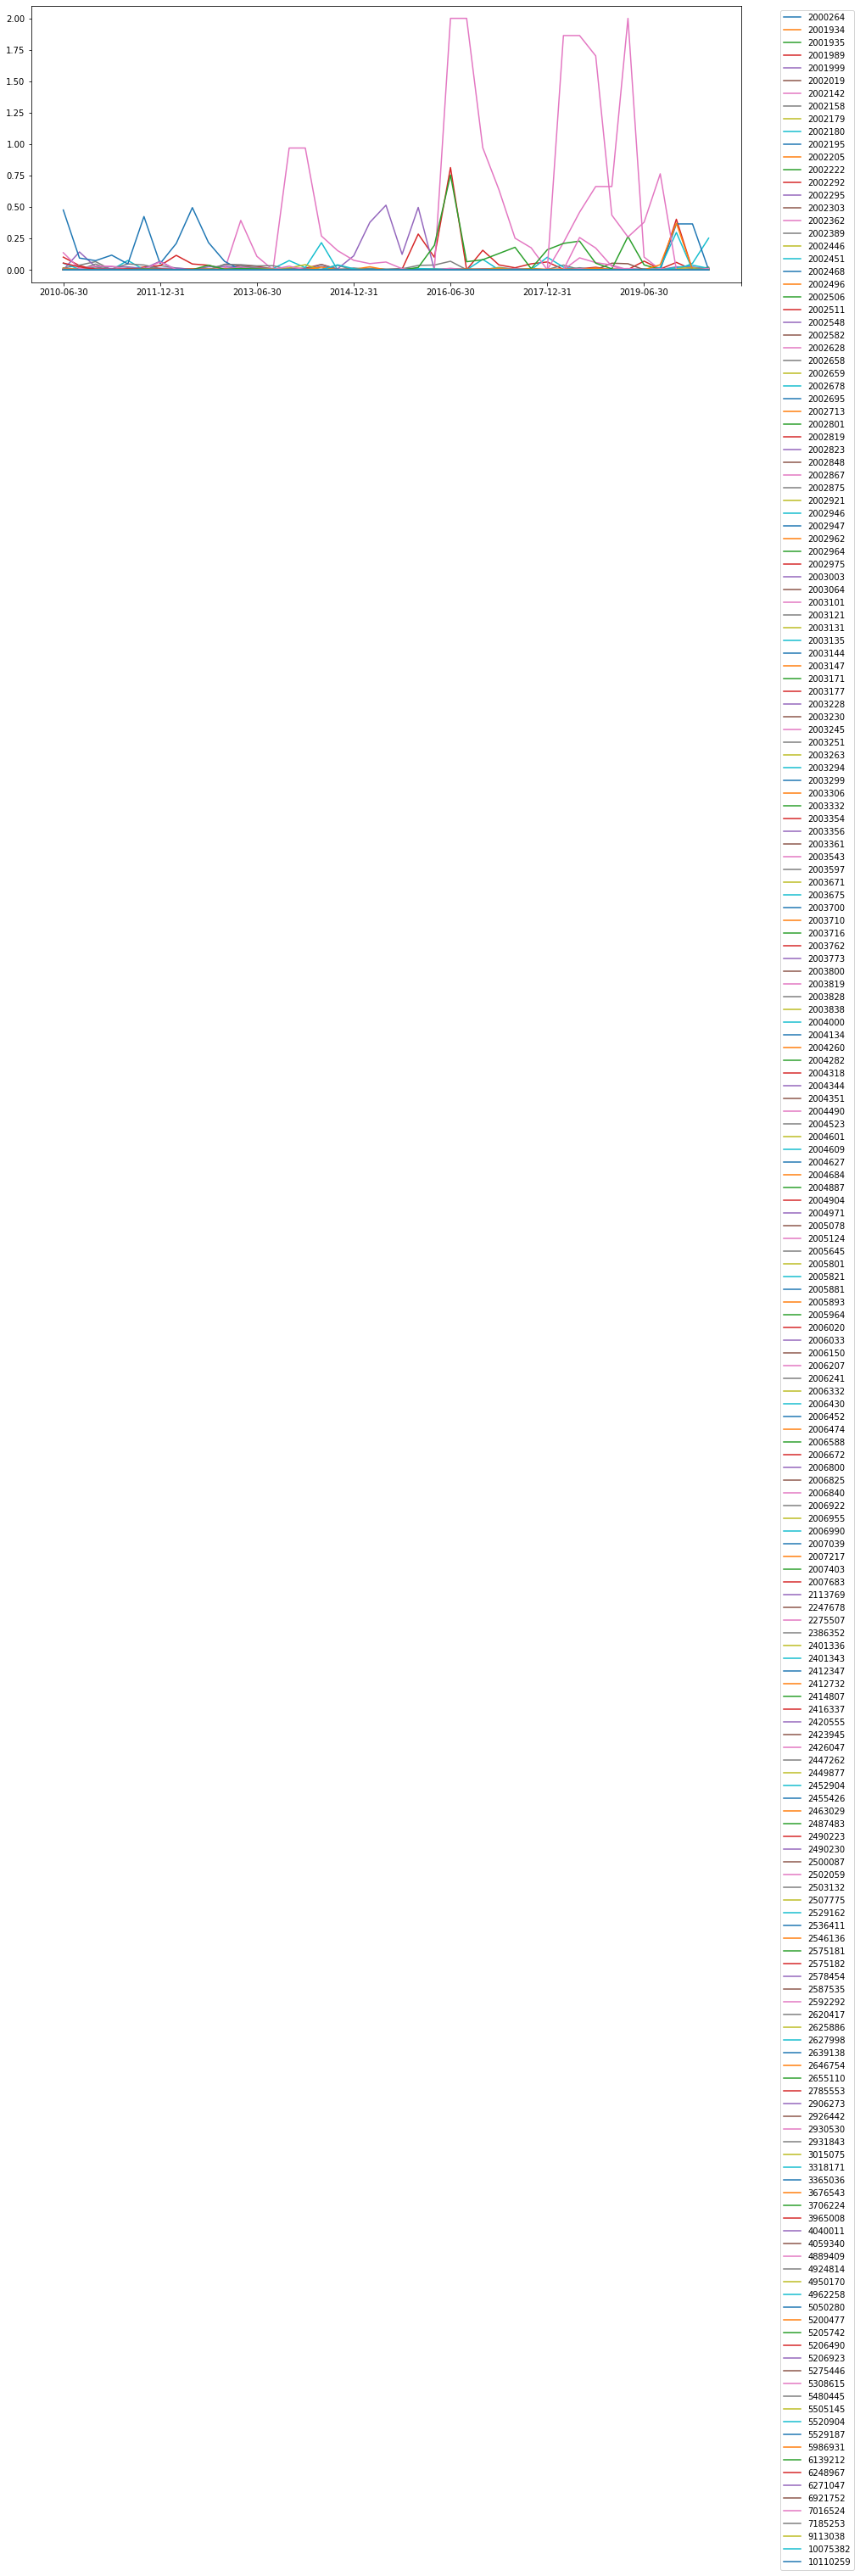

In [109]:
fig = plt.figure(figsize=(15, 6))
for comp in df_ts.columns:
    plt.plot(df_ts[comp], label=comp)
plt.xticks(range(0,len(df_ts.index)+3,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.locator_params(axis='x', nbins=10)
plt.show()

## Top 10 and Tail 10 Sum of Variances 

In [194]:
delta_sum = {}
for t in df_ts.columns:
    delta_sum[t] = np.sum(df_ts[t])

In [200]:
high = sorted(delta_sum, key=delta_sum.get, reverse=True)[:10]
for i in high:
    print(get_comp_name(i))

MKP Capital Management, L.L.C.
Tilden Park Capital Management LP
Pharo Management, Inc.
Capula Investment Management LLP
CarVal Investors L.P.
King Street Capital Management, L.P.
Cerberus Capital Management, L.P.
Highfields Capital Management, L.P.
Hartford Funds Management Company, LLC
Quilter Investors Limited


In [201]:
high = sorted(delta_sum, key=delta_sum.get, reverse=False)[:10]
for i in high:
    print(get_comp_name(i))

Dimensional Fund Advisors, L.P.
BlackRock Institutional Trust Company, N.A.
The Vanguard Group, Inc.
Northern Trust Investments, Inc.
BlackRock Investment Management, LLC
Columbia Threadneedle Investments (US)
Geode Capital Management, L.L.C.
MetLife Investment Management, LLC
State Street Global Advisors (US)
Principal Global Investors (Equity)


## Top 10 and Tail 10 Sum of Variances to Market

In [208]:
delta_sum = {}
df_temp_fill = df_temp.transpose().fillna(0)
for t in df_temp_fill.columns:
    delta_sum[t] = np.sum(df_temp_fill[t])

In [209]:
high = sorted(delta_sum, key=delta_sum.get, reverse=True)[:10]
for i in high:
    print(get_comp_name(i))

MKP Capital Management, L.L.C.
Tilden Park Capital Management LP
Pharo Management, Inc.
Capula Investment Management LLP
CarVal Investors L.P.
King Street Capital Management, L.P.
Cerberus Capital Management, L.P.
Highfields Capital Management, L.P.
Hartford Funds Management Company, LLC
Quilter Investors Limited


In [210]:
high = sorted(delta_sum, key=delta_sum.get, reverse=False)[:10]
for i in high:
    print(get_comp_name(i))

Quilter Cheviot Investment Management
Franklin Templeton International Services SARL
Principal Street Partners, LLC
Natixis Wealth Management SA
MetLife Investment Management, LLC
Prudential Financial Securities Invt.Trust Enterprise Ltd.
Fidelity Investments Canada ULC
William Blair Investment Management, LLC
GAM Systematic LLP
OrbiMed Advisors, LLC
